In [1]:
# project: p13
# submitter: qfeng43
# partner:None
# hours: 12

In [2]:
import sqlite3
import pandas as pd
import matplotlib
from questions import verify_plot
import math
import os
import requests
import numpy as np # this is for given code - do not use it yourself

In [3]:
# ensures that font.size setting remains permanent
%matplotlib inline
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13 # don't use value > 13! Otherwise your y-axis tick labels will be different

In [4]:
def bar_plot(df, x, y):
    # TODO: Use df.plot.bar to plot the data in black with no legend
    df = df.set_index(x)
    plot = df.plot.bar(color="black")
    # TODO: set x as the x label 
    plot.set_xlabel(x)
    # TODO: set y as the y label
    plot.set_ylabel(y)
    # TODO: set the color to black
    return plot

def scatter_plot(df, x, y):
    # TODO: Use df.plot.scatter to plot the data in black with no legend
    # TODO: set x as the x label 
    # TODO: set y as the y label
    # TODO: set the color to black
    df = df.plot.scatter(x = x,y = y,color = "black")
    
    return df
    
#from lab 13
def plot_horizontal_bar(df, x):
    df = df.set_index(x)
    ax = df.plot.barh()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

#from lab 13
def plot_pie(df, x, y, title=None):
    df = df.set_index(x)
    ax = df.plot.pie(y=y, legend=False)
    ax.set_ylabel(None)
    ax.set_title(title)

#from lab 13
# df: A dataframe

# x: The name of a column in df. The values in this column will be used
# as the x-axis values (independent variable)

# y: The name of a column in df. The values in this column will be used
# as the y-axis values (dependent variable)

# Returns: the slope (m) and y-intercept (b) of the line of best fit
def get_regression_coeff(df, x, y):
    df["1"] = 1
    res = np.linalg.lstsq(df[[x, "1"]], df[y], rcond=None)
    coefficients = res[0]
    m = coefficients[0]
    b = coefficients[1]
    return (m, b)

def plot_regression_line(df, x, y):
    # TODO: Use the get_regression_coeff function to get the slope and
    # intercept of the line of best fit. Save them into variables m and b respectively
    m = get_regression_coeff(df, x, y)[0]
    b = get_regression_coeff(df, x, y)[1]
    # TODO: Use df.plot.scatter (not scatter_plot) to plot the x and y columns in black.
    # and save the return value of scatter to a variable called ax
    ax = df.plot.scatter(x = x,y = y,color = "black")
    
    # TODO: Create a new column in the dataframe called "fit", which is
    # is calculated according to "fit" = m * x + b. x is a value in the
    # x column of the dataframe.
    df['fit'] =  m * df[x]+ b
    # TODO: Use df.plot.line to plot the fitted line in red, using ax=ax as a keyword argument
    # this ensures that both the scatter plot and line end up on the same plot
    return df.plot.line(x,"fit",ax = ax,color = 'red')
    

# TODO: Call plot_regression_line on your data from task 3.2 to show the correlation between
# employer_reputation and academic_reputation


In [5]:
# TODO: Copy your download function from p12 and download QSRanking.json
def download(url,filename):
    # Do not download again if the file already exists
    # Use the appropriate os module function to check if the target file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    # make the request
    # get the text from the request
    # open the file
    # write the text to the file
    # close the file
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.text)
    return (str(filename) + " created!")

# Make sure your download function works by downloading QSRankings.json:
download("https://raw.githubusercontent.com/msyamkumar/cs220-s22-projects/main/p13/QSranking.json", "QSranking.json")

'QSranking.json already exists!'

In [6]:
# TODO: Load the data from QSranking.json into a variable called df1 using pandas's read_json
df1 = pd.read_json("QSranking.json")
# TODO: connect to 'rankings.db' and save it to a variable called conn
conn = sqlite3.connect('rankings.db')
# We'll give you this line since it wasn't covered in lecture
# It writes a dataframe's contents to a sqlite database
df1.to_sql("rankings", conn, if_exists="replace", index=False)

In [7]:
#Q1: Which 10 institutions in Canada had the highest number of international students in 2020?
# query = """
#     select institution_name AND international_students
#     from rankings
#     where country = "Canada" AND year = 2020
#     ORDER BY international_students DESC, 
#     limit 10
# """

query = """
    select institution_name,international_students
    from rankings
    where year == "2020" AND country == "Canada"
    ORDER BY international_students DESC
    limit 10
"""
pd.read_sql(query, conn)


,institution_name,international_students
0,Mcgill University,96.2
1,University Of Toronto,93.0
2,Simon Fraser University,91.5
3,University Of Waterloo,84.1
4,University Of Alberta,80.8
5,University Of British Columbia,79.3
6,Dalhousie University,73.4
7,Université De Montréal,61.8
8,University Of Calgary,61.2
9,University Of Ottawa,56.7


In [8]:
#Q2: Which 10 institutions in the United States had the highest reputation in 2019?
query = """
    SELECT institution_name,SUM(academic_reputation) + SUM(employer_reputation) AS reputation
    FROM rankings
    where country = "United States" AND year == 2019
    GROUP BY institution_name
    ORDER BY reputation DESC,institution_name 
    limit 10
"""
pd.read_sql(query, conn)


,institution_name,reputation
0,Harvard University,200.0
1,Massachusetts Institute Of Technology,200.0
2,Stanford University,200.0
3,"University Of California, Berkeley",199.8
4,Yale University,199.6
5,"University Of California, Los Angeles",199.1
6,Columbia University,197.1
7,Princeton University,196.6
8,University Of Chicago,190.3
9,Cornell University,189.2


In [9]:
#Q3: Which 10 countries had the most institutions listed in the year 2020?
#country and num_of_institutions
query = """
    SELECT country, COUNT(country) AS num_of_institutions
    FROM rankings
    where year == 2020
    GROUP BY country
    ORDER BY num_of_institutions DESC,country
    limit 10
"""
df = pd.read_sql(query, conn)
df

,country,num_of_institutions
0,United States,74
1,United Kingdom,45
2,Germany,23
3,Australia,21
4,Canada,14
5,China,14
6,France,14
7,Japan,14
8,Netherlands,13
9,Russia,13


<AxesSubplot:xlabel='country', ylabel='num_of_institutions'>

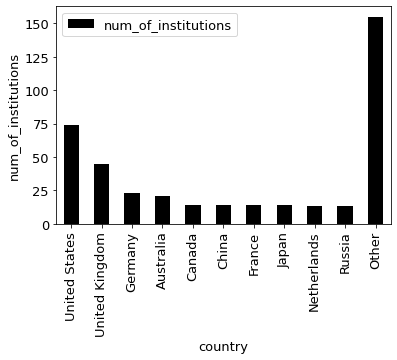

In [10]:
#Q4: Plot the data from Q3 as a bar chart, along with the sum of all other countries' institutions.
#total ten countries's institution 

query = """
    SELECT country, COUNT(country) AS num_of_institutions
    FROM rankings
    where year == 2020
    GROUP BY country
    ORDER BY num_of_institutions DESC,country
"""
q4 = pd.read_sql(query, conn)
num_institutions = df.append({"country": "Other", "num_of_institutions":  q4["num_of_institutions"].iloc[10:].sum()}, ignore_index=True)
bar_plot(num_institutions, "country", "num_of_institutions")

In [11]:
#q4.1
verify_plot(num_institutions, 4)

True

In [12]:
#Q5: In 2019, what were the top 10 countries by total overall_score?
query = """
    SELECT country, SUM(overall_score) AS total_score
    FROM rankings
    where year == 2019
    GROUP BY country
    ORDER BY total_score DESC
    limit 10
"""
top_total_score = pd.read_sql(query, conn)
top_total_score

,country,total_score
0,United States,4298.4
1,United Kingdom,2539.2
2,Germany,1098.2
3,Australia,1093.8
4,Japan,752.9
5,China,743.4
6,Canada,705.3
7,Netherlands,674.9
8,South Korea,612.8
9,France,595.2


<AxesSubplot:xlabel='country', ylabel='total_score'>

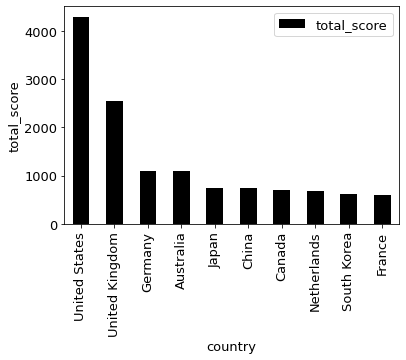

In [13]:
#Q6: Plot the data from Q5 as a bar chart.
bar_plot(top_total_score, "country", "total_score")

In [14]:
#q6.1
verify_plot(top_total_score, 6)

True

In [15]:
#Q7: In the year 2020, what are the top 10 universities in the US with the biggest international score?
query = """
    SELECT institution_name, SUM(international_faculty) + SUM(international_students) AS international_score
    FROM rankings
    where year == "2020" AND country == "United States"
    GROUP BY institution_name
    ORDER BY international_score DESC
    limit 10
"""

pd.read_sql(query, conn)

,institution_name,international_score
0,Massachusetts Institute Of Technology,194.1
1,California Institute Of Technology,186.7
2,Carnegie Mellon University,183.5
3,Rice University,180.4
4,Northeastern University,179.1
5,Stanford University,167.5
6,Cornell University,166.1
7,Purdue University,158.2
8,University Of Rochester,157.9
9,University Of Chicago,151.2


<AxesSubplot:xlabel='citations_per_faculty', ylabel='overall_score'>

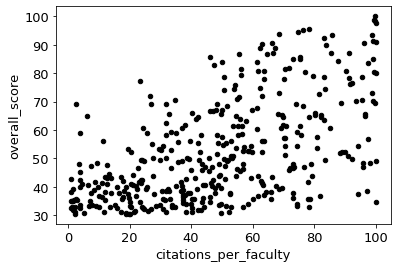

In [16]:
#Q8: In the year 2018, what is the relationship between citations_per_faculty and overall_score?
query = """
    SELECT citations_per_faculty, overall_score
    FROM rankings
    where year == "2018"
"""
df = pd.read_sql(query, conn)
scatter_plot(df,"citations_per_faculty","overall_score")

In [17]:
#q8.1
verify_plot(df, 8)

True

<AxesSubplot:xlabel='academic_reputation', ylabel='employer_reputation'>

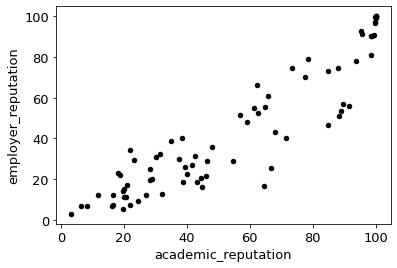

In [18]:
#Q9: In the year 2019, what is the relationship between academic_reputation and employer_reputation for institutions in the United States?
query = """
    SELECT academic_reputation, employer_reputation
    FROM rankings
    where year == "2019" AND country == "United States"
"""
df = pd.read_sql(query, conn)
scatter_plot(df,"academic_reputation", "employer_reputation")

In [19]:
#q9.1
verify_plot(df, 9)

True

<AxesSubplot:xlabel='international_students', ylabel='faculty_student_score'>

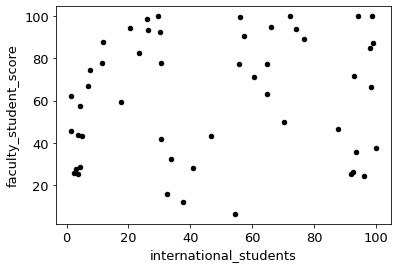

In [20]:
#Q10: In the year 2020, what is the relationship between international_students and faculty_student_score for the top ranked institution in each country?
query = """
    SELECT international_students, faculty_student_score 
    FROM rankings
    where year == "2020" 
    group by country
"""
df = pd.read_sql(query, conn)
scatter_plot(df,"international_students", "faculty_student_score")

In [21]:
#q10.1
verify_plot(df, 10)

True

In [22]:
#Q11: Find the correlation between international_students and overall_score for institutions in the 'United Kingdom' that were ranked in the top 100 in the year 2020. Perform the same calculation for institutions in the 'United States'. What is the difference between these two correlations?
query = """
    SELECT international_students,overall_score
    FROM rankings
    where year == "2020" AND country == "United Kingdom" AND rank<= 100
"""
uk_corr = pd.read_sql(query, conn)
uk_corr_value = uk_corr.corr().iloc[0][1]
#print(uk_corr_value)
query = """
    SELECT institution_name,international_students,overall_score
    FROM rankings
    where year == "2020" AND country == "United States" AND rank<= 100
"""
us_corr = pd.read_sql(query, conn)
us_corr_value = us_corr.corr().iloc[0][1]
#print(us_corr_value)
cor_diff_us_uk = abs(us_corr_value - uk_corr_value)
cor_diff_us_uk

0.18978846844574526

In [23]:
#Q12: In the year 2019, what is the correlation between citations_per_international and overall_score?
query = """
    SELECT (citations_per_faculty * international_faculty) / 100 AS citations_per_international,overall_score
    FROM rankings
    where year == "2019"
"""
corr_citation_overall = pd.read_sql(query, conn).corr().iloc[0][1]
corr_citation_overall

0.557397228343763

In [24]:
#Q13: In the year 2019, find the top 15 countries which have the highest total of citations_per_international.
query = """
    SELECT country,SUM((citations_per_faculty * international_faculty) / 100) AS sum_intl_citations
    FROM rankings
    where year == "2019"
    GROUP BY country
    ORDER by sum_intl_citations DESC
    limit 15
"""
pd.read_sql(query, conn)

,country,sum_intl_citations
0,United States,2623.8207
1,United Kingdom,2347.1602
2,Australia,1255.5530
3,Netherlands,748.4268
4,Canada,724.5029
5,Switzerland,561.8790
6,China,482.2577
7,Germany,455.5466
8,Hong Kong,375.3032
9,New Zealand,327.3357


In [25]:
#Q14: In the year 2019, among the institutions ranked within the top 300, find the average of citations_per_international for each country.
query = """
    SELECT country,AVG((citations_per_faculty * international_faculty) / 100) AS avg_intl_citations
    FROM rankings
    where year == "2019" AND rank<= 300
    GROUP BY country
    ORDER BY avg_intl_citations DESC
"""
pd.read_sql(query, conn)

,country,avg_intl_citations
0,Singapore,80.150000
1,Switzerland,75.497000
2,Hong Kong,62.550533
3,Australia,61.362388
4,Netherlands,56.166733
5,New Zealand,53.226220
6,United Kingdom,52.889084
7,Canada,50.779723
8,Denmark,46.196200
9,Norway,46.083300


In [26]:
#Q15: Find the institution with the highest value for citations_per_international for each country in the year 2020.

query_15 =  """
    select country,institution_name,MAX((citations_per_faculty * international_faculty) / 100) AS max_intl_citations 
    FROM rankings
    where year == 2020 
    GROUP BY country
    HAVING "max_intl_citations" IS NOT NULL
    ORDER BY max_intl_citations  DESC
"""
pd.read_sql(query_15, conn)


,country,institution_name,max_intl_citations
0,United States,Massachusetts Institute Of Technology,99.8000
1,Switzerland,Ecole Polytechnique Fédérale De Lausanne,98.9000
2,Netherlands,Eindhoven University Of Technology,95.4493
3,United Kingdom,London School Of Economics And Political Science,91.1000
4,Hong Kong,The Hong Kong University Of Science And Technology,89.5000
5,Singapore,Nanyang Technological University,88.8000
6,Australia,The University Of Western Australia,88.3000
7,Belgium,Katholieke Universiteit Leuven,76.7700
8,New Zealand,University Of Waikato,73.6434
9,Canada,Western University,72.3240


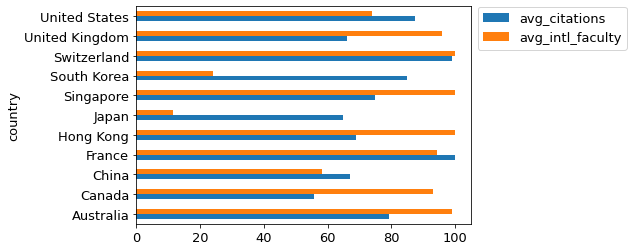

In [27]:
#Q16: Among the institutions ranked within the top 50, generate a barplot visualizing the average of citations_per_faculty and international_faculty for each country in the year 2018.
query = """
    SELECT country,AVG(citations_per_faculty)AS avg_citations,AVG(international_faculty) AS avg_intl_faculty
    FROM rankings
    where year == 2018 AND rank<=50
    GROUP BY country
"""
q16 = pd.read_sql(query, conn)
plot_horizontal_bar(q16, "country")

In [28]:
q16

,country,avg_citations,avg_intl_faculty
0,Australia,79.260000,98.940000
1,Canada,55.700000,92.950000
2,China,66.900000,58.133333
3,France,100.000000,94.400000
4,Hong Kong,69.050000,99.950000
5,Japan,64.850000,11.400000
6,Singapore,74.750000,100.000000
7,South Korea,85.050000,24.100000
8,Switzerland,98.950000,100.000000
9,United Kingdom,65.988889,95.788889


In [29]:
#q16.1
verify_plot(q16,16)

True

<AxesSubplot:xlabel='overall_score', ylabel='rank'>

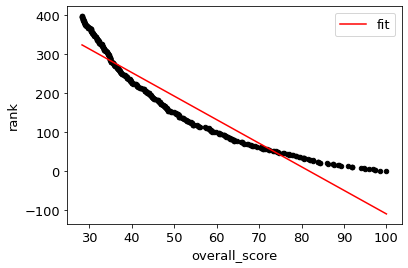

In [30]:
#Q17: What is the relationship between overall_score and rank for all the institutions in the year 2020?
query = """
    SELECT overall_score,rank
    FROM rankings
    WHERE year ==2020
"""
q17 = pd.read_sql(query, conn)
plot_regression_line(q17, "overall_score", "rank")

In [31]:
#q17.1
verify_plot(q17,17)

True

<AxesSubplot:xlabel='inverse_overall_score', ylabel='rank'>

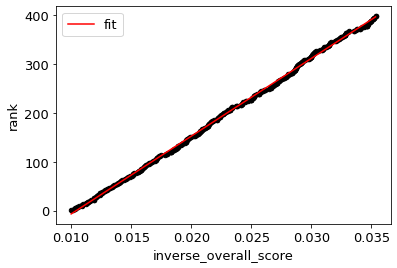

In [32]:
#Q18: What is the relationship between 1 / overall_score and rank for all the institutions in the year 2020?
query = """
    SELECT 1 / overall_score AS inverse_overall_score, rank
    FROM rankings
    WHERE year ==2020
"""
q18 = pd.read_sql(query, conn)
plot_regression_line(q18, "inverse_overall_score", "rank")

In [33]:
#q18.1
verify_plot(q18,18)

True

In [34]:
#Q19: Use the regression line to estimate the rank of an institution with overall_score of 72.
#y = m * x + b
m = get_regression_coeff(q18, "inverse_overall_score", "rank")[0]
b = get_regression_coeff(q18, "inverse_overall_score", "rank")[1]
x = 1/72
y = m * x + b
math.ceil(y)

56

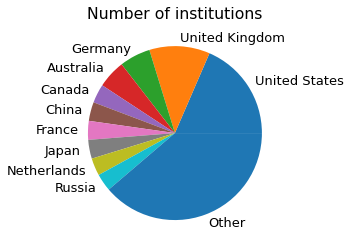

In [35]:
#Q20: What was the distribution of institutions in 2020 by country?
plot_pie(num_institutions, 'country','num_of_institutions', title="Number of institutions")

In [36]:
#q20.1
verify_plot(num_institutions ,20)

True

In [37]:
conn.close()